# Web Scrapping
- David Pilataxi
- Gr1cc
- 8 de enero de 2025

## Enlace al Repositorio

LINK: https://github.com/freddy1604/RepositorioDeMetodosNumericos/tree/main/%5BActividad%20extracurricular%2012%5D%20web%20scraping

# 1. Objetivos
- Revisar qué es web scraping
- Realizar una prueba en python para dos librerías diferentes
- Realizar scraping de un sitio web de su elección

# 2. Introducción
Es el proceso de extraer datos de sitios web de manera automatizada utilizando herramientas o scripts. Esto se logra accediendo al contenido de las páginas web, ya sea analizando el HTML, extrayendo datos estructurados, o interactuando con elementos dinámicos.

Aplicaciones comunes de web scraping:

- Análisis de precios en sitios de comercio electrónico.
- Monitorización de noticias o contenidos en tiempo real.
- Recolección de información para proyectos de investigación o estudios de mercado.
- Extracción de datos de directorios en línea o bases de datos accesibles públicamente.

Herramientas populares para web scraping:

- BeautifulSoup (Python) para extraer datos de HTML.
- Selenium para interactuar con páginas dinámicas.
- Scrapy, un framework avanzado para tareas de scraping masivo.   

# 3. Procedimiento
Web Scraping: BeautifulSoup vs Scrapy

**Configuración inicial**

- !pip install requests beautifulsoup4 pandas scrapy


### 3.1. Web Scraping con BeautifulSoup. -

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sitio web
url = "https://www.python.org/blogs/"

# Enviar la solicitud HTTP
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Ajustar los selectores para títulos y enlaces
    titles = [title.text.strip() for title in soup.select("li h3")]
    links = [link['href'] for link in soup.select("li h3 a")]

    # Crear DataFrame
    data = pd.DataFrame({"Título": titles, "Enlace": links})
    data.to_csv("python_org_blogs.csv", index=False)

    print("Datos extraídos de Python.org:")
    print(data.head())
else:
    print(f"Error: No se pudo acceder al sitio web. Código de estado {response.status_code}")


Datos extraídos de Python.org:
                                              Título  \
0     PSF Grants: Program & Charter Updates (Part 1)   
1       PSF Grants: Program & Charter Updates (TLDR)   
2     PSF Grants: Program & Charter Updates (Part 3)   
3  Announcing Python Software Foundation Fellow M...   
4                       Python 3.14.0 alpha 3 is out   

                                              Enlace  
0  https://pyfound.blogspot.com/2024/12/psf-grant...  
1  https://pyfound.blogspot.com/2024/12/psf-grant...  
2  https://pyfound.blogspot.com/2024/12/12psf-gra...  
3  https://pyfound.blogspot.com/2024/12/announcin...  
4  https://pythoninsider.blogspot.com/2024/12/pyt...  


![](Imagen1.png)

### 3.2. Web Scraping con Scrapy 

Pasos en terminal:
- pip install scrapy
- scrapy startproject quotes_scraper
- scrapy crawl quotes -o quotes.json  
El siguiente es el código para el web scrapping, y acontinuación, se presenta el resultado tras correrlo desde la terminal en un archivo independiente.



In [2]:

class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        # Extraer todas las citas de la página
        for quote in response.css('div.quote'):
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.css('span small::text').get(),
                'tags': quote.css('div.tags a.tag::text').getall(),
            }

        # Seguir al siguiente página, si existe
        next_page = response.css('li.next a::attr(href)').get()
        if next_page:
            yield response.follow(next_page, self.parse)


NameError: name 'scrapy' is not defined

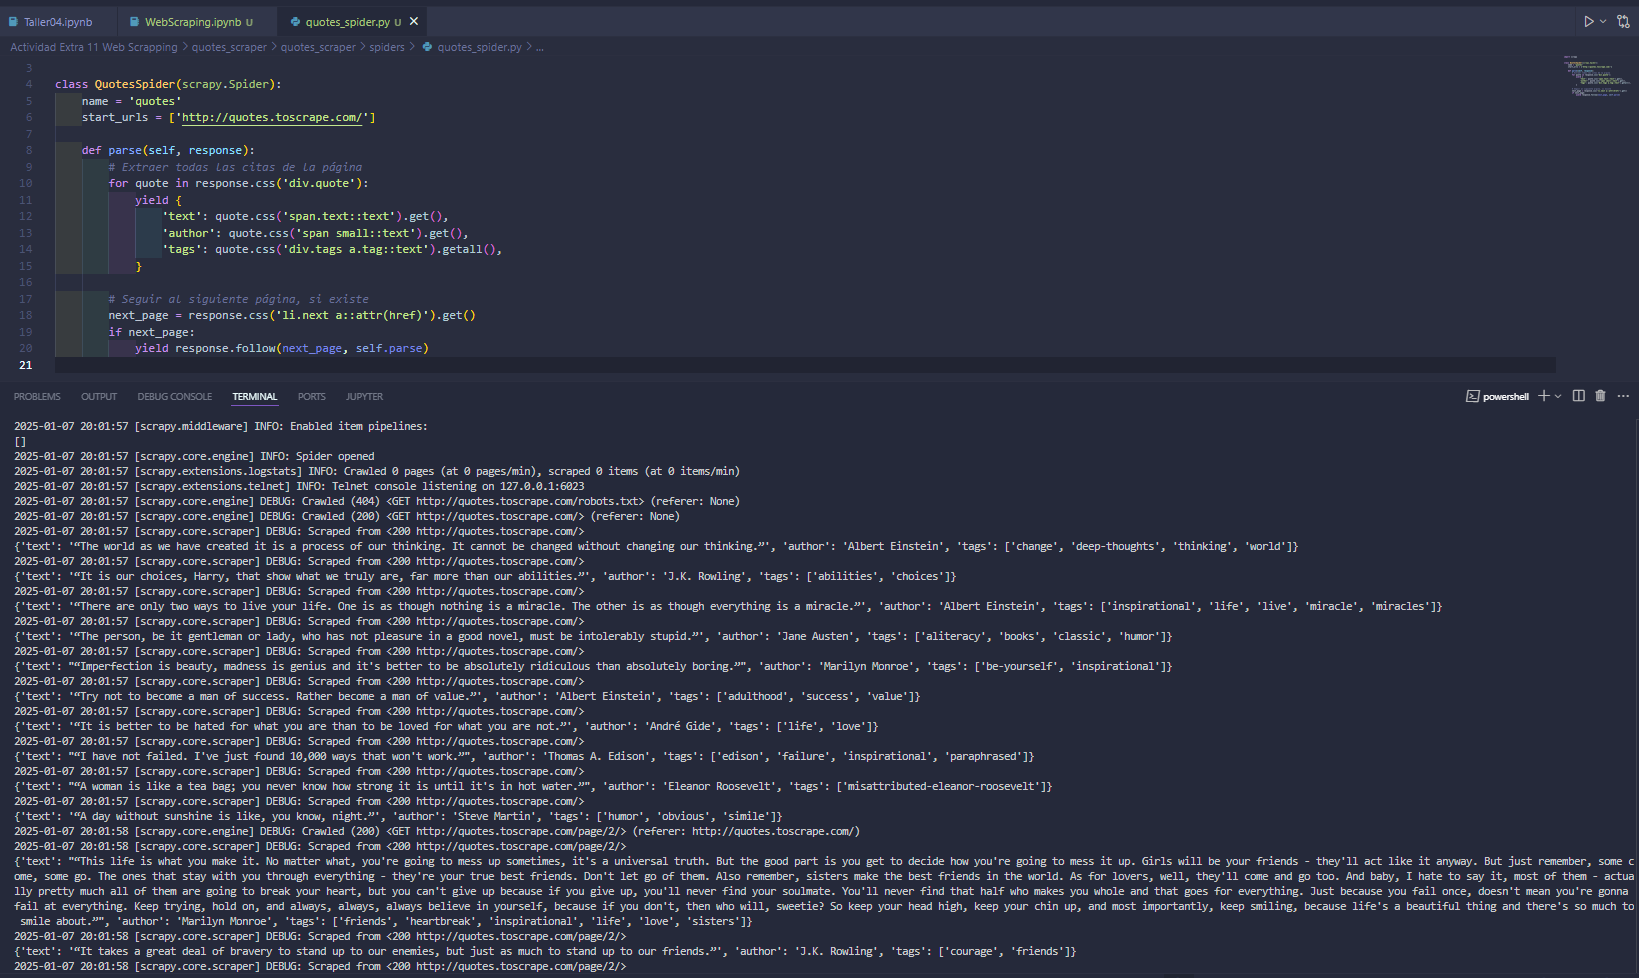

![](Imagen2.png)

# 4. Conclusiones
- BeautifulSoup destaca por su simplicidad, lo que lo convierte en una opción ideal para proyectos pequeños o tareas de scraping sencillas.

- Scrapy, por otro lado, es una herramienta escalable, diseñada para manejar proyectos más complejos o grandes volúmenes de datos, lo que lo convierte en la opción preferida para scraping masivo.

- Entre las limitaciones comunes en el scraping, se encuentran los problemas legales, ya que es importante respetar las políticas de uso de los sitios web. Además, pueden surgir bloqueos o restricciones en los sitios que dificultan la recolección de datos.

- Una consideración adicional es la gestión de la eficiencia, ya que Scrapy, al ser más robusto, permite manejar peticiones concurrentes y tiempos de espera, mientras que BeautifulSoup puede volverse menos eficiente en proyectos más grandes debido a su naturaleza más simple.

# 5. Referencias Bibliográficas
- **Requests:**

Reitz, K. (2023). Requests: HTTP for Humans. Python Software Foundation. Recuperado de https://docs.python-requests.org/en/latest/

- **BeautifulSoup:**

Richardson, L. (2023). Beautiful Soup Documentation. Python Software Foundation. Recuperado de https://www.crummy.com/software/BeautifulSoup/

- **Pandas:**

McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 51-56). Recuperado de https://pandas.pydata.org/

- **Scrapy:**

Scrapy Developers. (2023). Scrapy Documentation. Recuperado de https://docs.scrapy.org/en/latest/

- **Sitio web objetivo:**

Quotes to Scrape. (s.f.). Recuperado de https://quotes.toscrape.com